[K-means clustering]

1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.
2. Visualize K centroid images for each category.
3. Plot the training energy per optimization iteration.
4. Plot the training accuracy per optimization iteration.
5. Plot the testing accuracy per optimization iteration.

[energy]

$\sum_{k = 1}^K \| x_i - c_{k_i} \|^2$ 
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

[accuracy]

$\frac{\sum_{k = 1}^K m_k}{N}$
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.

#### Previous what we did.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

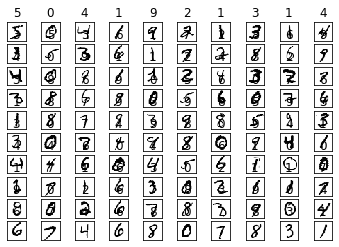

In [2]:
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()
size_row	= 28    # height of the image
size_col  	= 28    # width of the image
num_image	= len(data)
count       	= 0  # count for the number of images

def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1
    
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    
    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [3]:
avg_list_image =[[0]*784]*10

cnt1=[0,0,0,0,0,0,0,0,0,0]


for i in range(60000):
    if(list_label[i]== 0):                         #label = 0
            avg_list_image[0] += list_image[:,i]    
            cnt1[0]+=1
    elif (list_label[i]== 1):                      #label = 1
            avg_list_image[1] += list_image[:, i]
            cnt1[1]+=1
    elif (list_label[i]== 2):                      #label = 2
            avg_list_image[2] += list_image[:, i]
            cnt1[2]+=1
    elif (list_label[i]== 3):                      #label = 3
            avg_list_image[3] += list_image[:, i]
            cnt1[3]+=1
    elif (list_label[i]== 4):                      #label = 4
            avg_list_image[4] += list_image[:, i]
            cnt1[4]+=1
    elif (list_label[i]== 5):                      #label = 5
            avg_list_image[5] += list_image[:, i]
            cnt1[5]+=1    
    elif (list_label[i]== 6):                      #label = 6
            avg_list_image[6] += list_image[:, i]
            cnt1[6]+=1    
    elif (list_label[i]== 7):                      #label = 7
            avg_list_image[7] += list_image[:, i]
            cnt1[7]+=1 
    elif (list_label[i]== 8):                      #label = 8
            avg_list_image[8] += list_image[:, i]
            cnt1[8]+=1    
    else:
            avg_list_image[9] += list_image[:, i]  #label = 9
            cnt1[9]+=1

for i in range(10):
    avg_list_image[i]= avg_list_image[i]/cnt1[i]

#### To here, It was the last lab until this part. Let's start K-means.

#### I defined some functions for computing K-means.

In [66]:
def average_image(avg_label,store_func,b,cnt,z,avg_label_pre,label_cnt,list_accuracy, list_energy, acc_list,data_len):
    
    num=0
    p=0
    c=0
    m=0
    
    while(1):
        for j in range(data_len):
            avg_label[j] = kmeans_label(b[j],store_func,z)
            
        num+=1
        
        if c<len(list_energy):
            list_energy[p]=energy_func(store_func,b,avg_label)
            c+=1
            p+=1
            list_accuracy[m]=training_accuracy(list_label, avg_label,acc_list,data_len)
            m+=1
        
        
        if(np.array_equal(avg_label,avg_label_pre)):
            break
        
        store_func=[0]*len(store_func)
        cnt=[0]*len(cnt)
        avg_label_pre=np.copy(avg_label)
            
        for k in range(10000):
            store_func[avg_label[k]]+= b[k]
            cnt[avg_label[k]]+=1
 
        for l in range(len(cnt)):
            if(cnt[l]!=0):
                store_func[l] =store_func[l]/cnt[l]
        
    
        
    return  print("It iterated ",num,"times based on K-means algorithms ") 



def kmeans_label(x,y,z):
    for i in range(len(y)):
        z[i]=distance(x,y[i])
    return np.argmin(z)

def energy_func(store_func,b,avg_label):
    sum1=0
    
    for i in range(10000):
        d=(b[i]-store_func[avg_label[i]])**2
        sum1+=np.sum(d)
    
    return(sum1)

def arg_max(acc_list,A_Z):
   
    if len(A_Z)==None:
        return 0
    
    up_cnt=0
    acc_list=[0]*10
    
    for j in range(len(A_Z)):
        for k in range(10):
            if A_Z[j]==k:
                acc_list[k]+=1
    
    a=np.argmax(acc_list)
    
    for l in range(len(A_Z)):
        if A_Z[l]==a:
            up_cnt+=1
            
    return up_cnt
    
def training_accuracy(list_label, avg_label,acc_list,data_len):    
    
    A=[]
    B=[]
    C=[]
    D=[]
    E=[]
    F=[]
    G=[]
    H=[]
    I=[]
    J=[]
    K=[]
    L=[]
    M=[]
    N=[]
    O=[]
    P=[]
    Q=[]
    R=[]
    S=[]
    T=[]

    
    for i in range(data_len):
        if avg_label[i]==0:
            A=np.append(A,list_label[i])
        elif avg_label[i]==1:
            B=np.append(B,list_label[i])
        elif avg_label[i]==2:
            C=np.append(C,list_label[i])
        elif avg_label[i]==3:
            D=np.append(D,list_label[i])
        elif avg_label[i]==4:
            E=np.append(E,list_label[i])
        elif avg_label[i]==5:
            F=np.append(F,list_label[i])
        elif avg_label[i]==6:
            G=np.append(G,list_label[i])
        elif avg_label[i]==7:
            H=np.append(H,list_label[i])
        elif avg_label[i]==8:
            I=np.append(I,list_label[i])
        elif avg_label[i]==9:
            J=np.append(J,list_label[i])
        elif avg_label[i]==10:
            K=np.append(K,list_label[i])
        elif avg_label[i]==11:
            L=np.append(L,list_label[i])
        elif avg_label[i]==12:
            M=np.append(M,list_label[i])
        elif avg_label[i]==13:
            N=np.append(N,list_label[i])
        elif avg_label[i]==14:
            O=np.append(O,list_label[i])
        elif avg_label[i]==15:
            P=np.append(P,list_label[i])
        elif avg_label[i]==16:
            Q=np.append(Q,list_label[i])
        elif avg_label[i]==17:
            R=np.append(R,list_label[i])
        elif avg_label[i]==18:
            S=np.append(S,list_label[i])
        else:
            T=np.append(T,list_label[i])
    
    sum=0
    sum+=arg_max(acc_list,A)
    sum+=arg_max(acc_list,B)
    sum+=arg_max(acc_list,C)
    sum+=arg_max(acc_list,D)
    sum+=arg_max(acc_list,E)
    sum+=arg_max(acc_list,F)
    sum+=arg_max(acc_list,G)
    sum+=arg_max(acc_list,H)
    sum+=arg_max(acc_list,I)
    sum+=arg_max(acc_list,J)
    sum+=arg_max(acc_list,K)
    sum+=arg_max(acc_list,L)
    sum+=arg_max(acc_list,M)
    sum+=arg_max(acc_list,N)
    sum+=arg_max(acc_list,O)
    sum+=arg_max(acc_list,P)
    sum+=arg_max(acc_list,Q)
    sum+=arg_max(acc_list,R)
    sum+=arg_max(acc_list,S)
    sum+=arg_max(acc_list,T)

    
    return (sum/data_len)*100





# Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.

#### When k=5, It shows how many iterations have done.

In [5]:
#k=5
b=np.array(list_image.T)
store_func=np.array([avg_list_image[0],avg_list_image[2],avg_list_image[4],avg_list_image[6],avg_list_image[8]])

z5=np.array([0]*5)
cnt2=[0]*5
avg_label=np.array([0]*60000)
avg_label_pre=np.array([0]*60000)
label_cnt=0
list_energy5=[0]*50
list_accuracy5=[0]*50
acc_list=np.array([0]*10)
data_len=60000

average_image(avg_label,store_func,b,cnt2,z5,avg_label_pre,label_cnt,list_accuracy5,list_energy5, acc_list,data_len)

It iterated  53 times based on K-means algorithms 


#### When k=10, It shows how many iterations have done.

In [6]:
#k=10
store_func2=np.array([avg_list_image[0],avg_list_image[1],avg_list_image[2],avg_list_image[3],avg_list_image[4],avg_list_image[5],avg_list_image[6],avg_list_image[7],avg_list_image[8],avg_list_image[9]])
cnt3=[0]*10
z10=np.array([0]*10)
avg_label10=np.array([0]*60000)
avg_label_pre10=np.array([0]*60000)
label_cnt10=0
list_energy10=[0]*50
list_accuracy10=[0]*50

average_image(avg_label10,store_func2,b,cnt3,z10,avg_label_pre10,label_cnt10,list_accuracy10,list_energy10,acc_list,data_len)

It iterated  69 times based on K-means algorithms 


#### When k=15, It shows how many iterations have done.

In [7]:
#k=15
store_func3=np.array([avg_list_image[0],avg_list_image[1],avg_list_image[2],avg_list_image[3],avg_list_image[4],avg_list_image[5],avg_list_image[6],avg_list_image[7],avg_list_image[8],avg_list_image[9],b[0],b[1],b[2],b[3],b[4]])
cnt4=[0]*15
z15=np.array([0]*15)
avg_label15=np.array([0]*60000)
avg_label_pre15=np.array([0]*60000)
label_cnt15=0
list_energy15=[0]*100
list_accuracy15=[0]*100

average_image(avg_label15,store_func3,b,cnt4,z15,avg_label_pre15,label_cnt15,list_accuracy15,list_energy15,acc_list,data_len)


It iterated  116 times based on K-means algorithms 


#### When k=20, It shows how many iterations have done.

In [8]:
#k=20,
store_func4=np.array([avg_list_image[0],avg_list_image[1],avg_list_image[2],avg_list_image[3],avg_list_image[4],avg_list_image[5],avg_list_image[6],avg_list_image[7],avg_list_image[8],avg_list_image[9],b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9]])
cnt5=[0]*20
z20=np.array([0]*20)
avg_label20=np.array([0]*60000)
avg_label_pre20=np.array([0]*60000)
label_cnt20=0
list_energy20=[0]*100
list_accuracy20=[0]*100

average_image(avg_label20,store_func4,b,cnt5,z20,avg_label_pre20,label_cnt20, list_accuracy20, list_energy20,acc_list,data_len)

It iterated  132 times based on K-means algorithms 


#  Visualize K centroid images for each category.

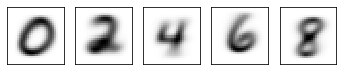

In [9]:
for i in range(5):
    im_matrix_avg   = store_func[i].reshape((size_row, size_col))
    
    plt.figure(1, figsize=(12,3.2))
#    plt.text(22,25.5,"%c" %'A', fontsize=12)
    plt.subplot(1, 10, i+1)
    plt.imshow(im_matrix_avg, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


#### It shows like this. Because I didn't use the random Centroid Number at first.  I chose Centroid of 0,2,4,6,8 from the last assignment!! Please notice that.

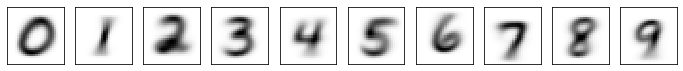

In [10]:
for i in range(10):
    im_matrix_avg   = store_func2[i].reshape((size_row, size_col))
    
    plt.figure(1, figsize=(12,3.2))
#    plt.text(22,25.5,"%d" %(i-1), fontsize=12)
    plt.subplot(1, 10, i+1)
    plt.imshow(im_matrix_avg, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

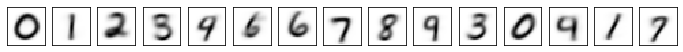

In [34]:
for i in range(15):
    im_matrix_avg   = store_func3[i].reshape((size_row, size_col))
    
    plt.figure(1, figsize=(12,3.2))
#    plt.text(22,25.5,"%d" %(i-1), fontsize=12)
    plt.subplot(1, 15, i+1)
    plt.imshow(im_matrix_avg, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

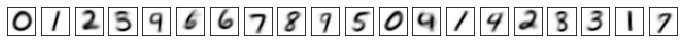

In [38]:
for i in range(20):
    im_matrix_avg   = store_func4[i].reshape((size_row, size_col))
    
    plt.figure(1, figsize=(12,3.2))
#    plt.text(22,25.5,"%d" %(i-1), fontsize=12)
    plt.subplot(1, 20, i+1)
    plt.imshow(im_matrix_avg, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Plot the training energy per optimization iteration.

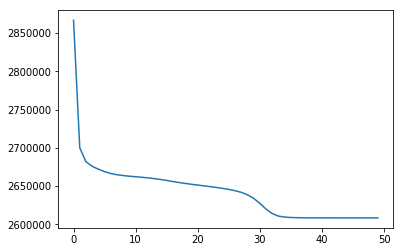

In [40]:
x=list(range(50))
y1=np.copy(list_energy5)

plt.plot(x,y1)


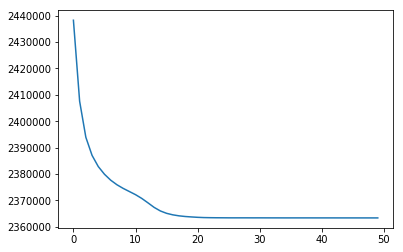

In [12]:
x2=list(range(50))
y2=np.copy(list_energy10)


plt.plot(x2,y2)

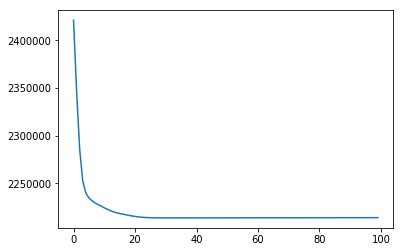

In [14]:
y3=np.copy(list_energy15)


plt.plot(y3)

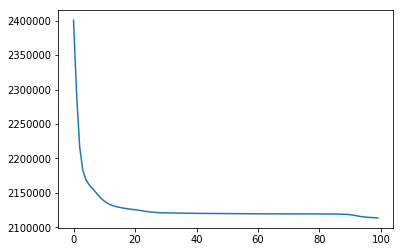

In [15]:
y4=np.copy(list_energy20)


plt.plot(y4)

# Plot the training accuracy per optimization iteration.

In [21]:
print("When k=5, The Accuracy is ",training_accuracy(list_label, avg_label,acc_list,60000),"%")

When k=5, The Accuracy is  45.755 %


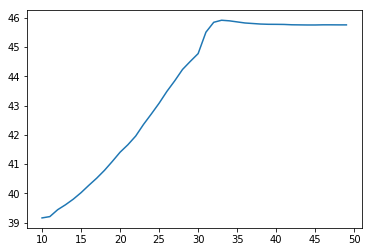

In [41]:
x5_accuracy=list(range(10,50))
y5_accuracy=np.copy(list_accuracy5[10:])
plt.plot(x5_accuracy,y5_accuracy)

In [25]:
print("When k=10, The Accuracy is ",training_accuracy(list_label, avg_label10,acc_list,60000),"%")

When k=10, The Accuracy is  58.901666666666664 %


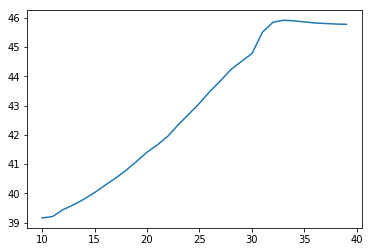

In [45]:
x10_accuracy=list(range(10,40))
y10_accuracy=np.copy(list_accuracy5[10:40])
plt.plot(x10_accuracy,y10_accuracy)

In [27]:
print("When k=15, The Accuracy is ",training_accuracy(list_label, avg_label15,acc_list,60000),"%")

When k=15, The Accuracy is  67.14833333333333 %


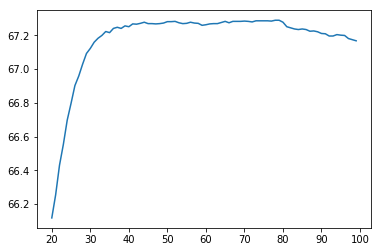

In [43]:
x15_accuracy=list(range(20,100))
y15_accuracy=np.copy(list_accuracy15[20:])
plt.plot(x15_accuracy,y15_accuracy)

In [32]:
print("When k=20, The Accuracy is ",training_accuracy(list_label, avg_label20,acc_list,60000),"%")

When k=20, The Accuracy is  70.19833333333332 %


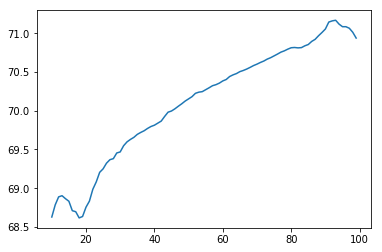

In [47]:
x20_accuracy=list(range(10,100))
y20_accuracy=np.copy(list_accuracy20[10:])
plt.plot(x20_accuracy,y20_accuracy)

# Plot the testing accuracy per optimization iteration.

In [61]:
file_data1		= "mnist_test.csv"
handle_file1	= open(file_data1, "r")
data1        		= handle_file1.readlines()
handle_file1.close()
size_row1	= 28    # height of the image
size_col1  	= 28    # width of the image
num_image1	= len(data1)
count1       	= 0  # count for the number of images


list_image1  = np.empty((size_row1 * size_col1, num_image1), dtype=float)
list_label1  = np.empty(num_image1, dtype=int)

for line in data1:

    line_data1   = line.split(',')
    label1       = line_data1[0]
    im_vector1   = np.asfarray(line_data1[1:])
    im_vector1   = normalize(im_vector1)

    list_label1[count1]       = label1
    list_image1[:, count1]    = im_vector1    

    count1 += 1
    
f2 = plt.figure(1)

<Figure size 432x288 with 0 Axes>

In [62]:
c=np.array(list_image1.T)
acc_list1=[0]*10


In [67]:
#k=5
store_func_1=np.array([avg_list_image[0],avg_list_image[2],avg_list_image[4],avg_list_image[6],avg_list_image[8]])

z5_1=np.array([0]*5)
cnt2_1=[0]*5
avg_label_1=np.array([0]*10000)
avg_label_pre_1=np.array([0]*10000)
label_cnt_1=0
list_energy5_1=[0]*50
list_accuracy5_1=[0]*50
data_len1=10000

average_image(avg_label_1,store_func_1,c,cnt2_1,z5_1,avg_label_pre_1,label_cnt_1,list_accuracy5_1,list_energy5_1, acc_list1,10000)

It iterated  44 times based on K-means algorithms 


In [70]:
#k=10
store_func2_1=np.array([avg_list_image[0],avg_list_image[1],avg_list_image[2],avg_list_image[3],avg_list_image[4],avg_list_image[5],avg_list_image[6],avg_list_image[7],avg_list_image[8],avg_list_image[9]])
cnt3_1=[0]*10
z10_1=np.array([0]*10)
avg_label10_1=np.array([0]*60000)
avg_label_pre10_1=np.array([0]*60000)
label_cnt10_1=0
list_energy10_1=[0]*50
list_accuracy10_1=[0]*50

average_image(avg_label10_1,store_func2_1,c,cnt3_1,z10_1,avg_label_pre10_1,label_cnt10_1,list_accuracy10_1,list_energy10_1,acc_list1,10000)

It iterated  40 times based on K-means algorithms 


In [80]:
#k=15
store_func3_1=np.array([avg_list_image[0],avg_list_image[1],avg_list_image[2],avg_list_image[3],avg_list_image[4],avg_list_image[5],avg_list_image[6],avg_list_image[7],avg_list_image[8],avg_list_image[9],b[0],b[1],b[2],b[3],b[4]])
cnt4_1=[0]*15
z15_1=np.array([0]*15)
avg_label15_1=np.array([0]*60000)
avg_label_pre15_1=np.array([0]*60000)
label_cnt15_1=0
list_energy15_1=[0]*100
list_accuracy15_1=[0]*100

average_image(avg_label15_1,store_func3_1,c,cnt4_1,z15_1,avg_label_pre15_1,label_cnt15_1,list_accuracy15_1,list_energy15_1,acc_list1,10000)

It iterated  42 times based on K-means algorithms 


In [88]:
#k=20일 때,
store_func4=np.array([avg_list_image[0],avg_list_image[1],avg_list_image[2],avg_list_image[3],avg_list_image[4],avg_list_image[5],avg_list_image[6],avg_list_image[7],avg_list_image[8],avg_list_image[9],b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9]])
cnt5_1=[0]*20
z20_1=np.array([0]*20)
avg_label20_1=np.array([0]*60000)
avg_label_pre20_1=np.array([0]*60000)
label_cnt20_1=0
list_energy20_1=[0]*100
list_accuracy20_1=[0]*100

average_image(avg_label20_1,store_func4_1,c,cnt5_1,z20_1,avg_label_pre20_1,label_cnt20_1, list_accuracy20_1, list_energy20_1,acc_list1,10000)

[1, 2, 3, 4, 5, 6]


#### K=5

In [68]:
print("When k=5, The Accuracy is ",training_accuracy(list_label1, avg_label_1,acc_list1,10000),"%")

When k=5, The Accuracy is  45.67 %


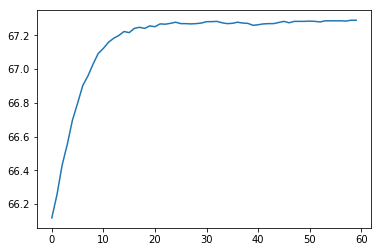

In [84]:

y5_1=np.copy(list_accuracy15[20:80])
plt.plot(y5_1)

#### K10

In [71]:
print("When k=10, The Accuracy is ",training_accuracy(list_label1, avg_label10_1,acc_list1,10000),"%")

When k=10, The Accuracy is  60.95 %


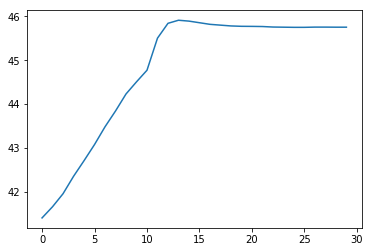

In [90]:
y10_accuracy=np.copy(list_accuracy5[20:65])
plt.plot(y10_accuracy)

In [94]:
print("When k=15, The Accuracy is ",training_accuracy(list_label1, avg_label15_1,acc_list1,10000),"%")

When k=15, The Accuracy is  66.24 %


#### K=15

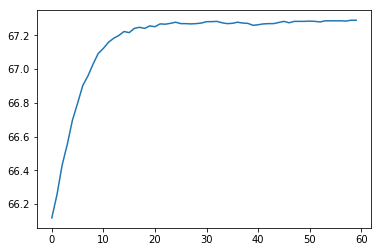

In [91]:
y15_accuracy=np.copy(list_accuracy15[20:80])
plt.plot(y15_accuracy)

#### K=20

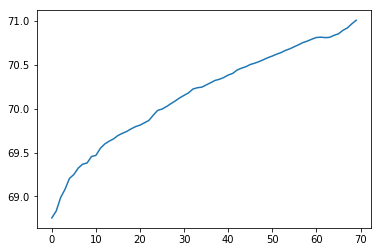

In [93]:
y20_accuracy=np.copy(list_accuracy20[20:90])
plt.plot(y20_accuracy)